# Earth quake

Problem

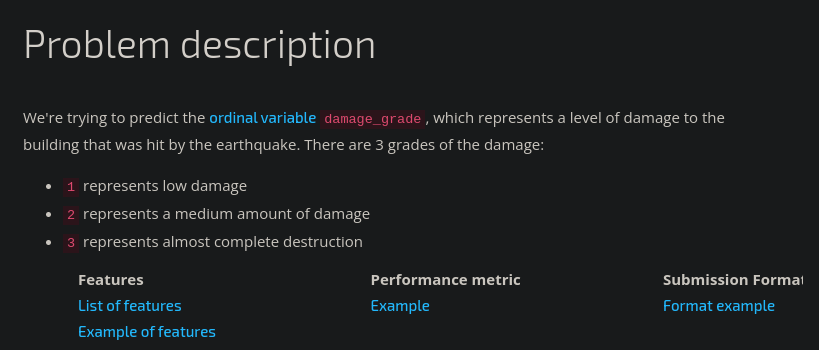

# Libraries

In [1]:
# Data
import pandas as pd
import numpy as np

# ML
## X, y
from sklearn.model_selection import train_test_split
## Models
from catboost import CatBoostClassifier
## Optimizers
import optuna
from optuna.samplers import TPESampler
## Metrics
from sklearn.metrics import f1_score

# Data

## Analize given data

In [2]:
df_train_labels = pd.read_csv('./dataset/train_labels.csv', index_col='building_id')
df_train_values = pd.read_csv('./dataset/train_values.csv', index_col='building_id')

In [3]:
df_train_labels

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3
...,...
688636,2
669485,3
602512,3


In [4]:
df_train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train = pd.concat([df_train_values, df_train_labels], axis=1)

Features

- geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
- count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
- age (type: int): age of the building in years.
- area_percentage (type: int): normalized area of the building footprint.
- height_percentage (type: int): normalized height of the building footprint.
- land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
- foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
- roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
- ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
- other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
- position (type: categorical): position of the building. Possible values: j, o, s, t.
- plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
- has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
- has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
- has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
- has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
- has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
- has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
- has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
- has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
- has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
- has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
- has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
- legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
- count_families (type: int): number of families that live in the building.
- has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
- has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
- has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
- has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
- has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
- has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
- has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
- has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
- has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
- has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
- has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.



In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

### New Features

In [19]:
df_train.loc[:, ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "count_floors_pre_eq", "age", "area_percentage", "height_percentage", "damage_grade"]].corr()["damage_grade"].sort_values()

area_percentage       -0.125221
geo_level_1_id        -0.072347
geo_level_3_id         0.007932
age                    0.029273
geo_level_2_id         0.043161
height_percentage      0.048130
count_floors_pre_eq    0.122308
damage_grade           1.000000
Name: damage_grade, dtype: float64

In [20]:
def create_new_feature(df: pd.DataFrame) -> pd.DataFrame:
    """Create new feature by corr matrix"""
    df["factor0"] = df["count_floors_pre_eq"] / df['area_percentage']
    # df['factor1'] = df['count_floors_pre_eq'] / df['geo_level_1_id']
    df['factor2'] = df['height_percentage'] / df['area_percentage']
    # df['factor3'] = df['height_percentage'] / df['geo_level_1_id']
    return df

In [21]:
df_train = create_new_feature(df_train)
# df_valid= create_new_feature(df_valid)

In [22]:
df_train.loc[:, ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id", "count_floors_pre_eq", "age", "area_percentage", "height_percentage", "damage_grade", "factor0", "factor1", "factor2", "factor3"]].corr()["damage_grade"].sort_values()

area_percentage       -0.125221
geo_level_1_id        -0.072347
factor3               -0.021397
factor1               -0.008364
geo_level_3_id         0.007932
age                    0.029273
geo_level_2_id         0.043161
height_percentage      0.048130
factor2                0.108787
count_floors_pre_eq    0.122308
factor0                0.140617
damage_grade           1.000000
Name: damage_grade, dtype: float64

NaNs?

In [7]:
df_train.isna().sum() # Oh, yeah!

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

<Axes: >

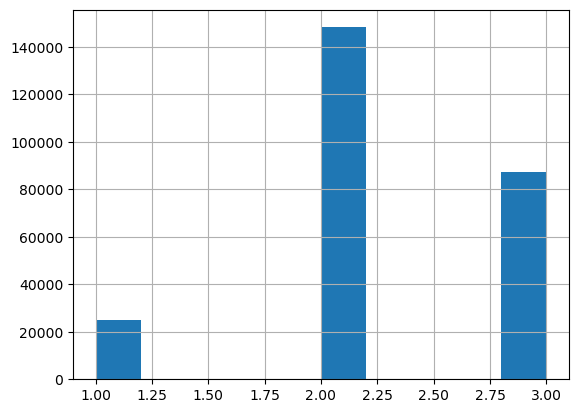

In [8]:
df_train['damage_grade'].hist()

В целом можно оставить как и есть. Добавить class_weight и все. Стратификация необязательна

# ML

## X, y

In [9]:
X = df_train.drop(columns=['damage_grade'])
y = df_train['damage_grade']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
cat_features = list(range(7, X.shape[1]))

## CatBoost

In [12]:
X_train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
485573,16,352,4849,3,15,11,7,t,r,n,...,0,1,0,0,0,0,0,0,0,0
41534,20,158,621,2,10,5,5,t,w,q,...,0,0,0,0,0,0,0,0,0,0
499861,8,678,3362,3,35,3,8,o,r,n,...,0,0,0,0,0,0,0,0,0,0
258103,8,1049,9986,2,15,10,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1046047,13,606,10986,2,40,11,5,t,r,q,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79888,13,909,1626,2,25,6,5,t,r,q,...,0,0,0,0,0,0,0,0,0,0
442764,10,1397,8182,2,5,5,4,n,r,n,...,0,0,0,0,0,0,0,0,0,0
17256,8,1073,5249,3,20,22,7,o,r,q,...,0,1,0,0,0,0,0,0,0,0


In [13]:
def objective(trial):
    class_weights = dict()
    class_weights[1] = trial.suggest_float("1", 0, 5)
    class_weights[2] = trial.suggest_float("2", 0, 5)
    class_weights[3] = trial.suggest_float("3", 0, 5)
    param = {
        "classes_count": 3,
        "iterations": trial.suggest_int("iterations", 100, 5_000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 1e-7, 100.0),
        "border_count": trial.suggest_int("border_count", 1, 200),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0),
        "max_ctr_complexity": trial.suggest_int("max_ctr_complexity", 1, 5),
        "objective": trial.suggest_categorical("objective", ["MultiClassOneVsAll", "MultiClass", "Precision", "F", "F1", "TotalF1", "HingeLoss", "HammingLoss", "AUC"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 3, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        # "used_ram_limit": "3gb",
        "class_weights": class_weights,
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=0, early_stopping_rounds=100, cat_features=cat_features)

    preds = cat_cls.predict(X_test)
    f1 = f1_score(y_test, preds, average='micro')
    return f1

In [14]:
sampler = TPESampler(seed=42)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=10, n_jobs=-1)

[I 2023-05-15 11:58:33,104] A new study created in memory with name: catboost
[W 2023-05-15 12:07:01,574] Trial 0 failed with parameters: {'1': 1.8727005942368125, '2': 4.75357153204958, '3': 3.6599697090570253, 'iterations': 3000, 'learning_rate': 0.1568626218019941, 'l2_leaf_reg': 15, 'border_count': 12, 'random_strength': 8.661761459087591, 'max_ctr_complexity': 4, 'objective': 'MultiClassOneVsAll', 'colsample_bylevel': 0.0737265320016441, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'od_type': 'Iter', 'od_wait': 27, 'bagging_temperature': 2.9122914019804194} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "/home/artem/micromamba/envs/ml/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_3645/1410720788.py", line 33, in objective
    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=0, early_stopping_rounds=1

KeyboardInterrupt: 

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))